# ☛ Problem Statement : 
<pre>Real estate transactions are quite opaque sometimes and it may be  difficult for a newbie to know the fair price of any given home. 
Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it.
Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build 
homes that fetch them more money.
It is expected to build a sale price prediction model that will aid the customers to find a fair price for their homes 
and also help the sellers understand what factors are fetching more money for the houses.</pre>



<img src='reak-estate.jpg'></img>

# ≣ Variables in the Dataset : Total 22 columns. 
       ✤ PRT_ID : Project ID (object)
       ✤ AREA : Area where the house is located (object)
       ✤ INT_SQFT : Total area of the house in square-feet (int)
       ✤ DATE_SALE : Date on which the house got sold (object)
       ✤ DIST_MAINROAD : Distance from the house to the mainroad -in meters(int)
       ✤ N_BEDROOM : Number of Bedrooms (float)
       ✤ N_BATHROOM : Number of Bathrooms (float)
       ✤ N_ROOM : Number of Rooms (int)
       ✤ SALE_COND : Sale Conditions (object)
       ✤ PARK_FACIL : Parking Facility (object)
       ✤ DATE_BUILD : Date on which the house was built (object)
       ✤ BUILD_TYPE : Type of the house (object)
       ✤ UTILITY_AVAIL : Utilities available for the owner of the house (object)
       ✤ STREET : Street where the house is located (object)
       ✤ MZZONE : Chennai Regions are divided into multiple zones, MZZONE is nothing but the zone where the house belongs to (object)
       ✤ QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL : Masked Data (float)
       ✤ REG_FEE : Registration Fees (int)
       ✤ COMMIS : Commission (int)
       ✤ SALE_PRICE : Price at which the house got sold (int)

## Importing necessary dependencies

In [1]:
# for data reading and data manipulation
import numpy as np
import pandas as pd
import statistics as st

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
# reading data from a .csv file to a Pandas DataFrame
df = pd.read_csv('chennai-house-price.csv')
pd.set_option('display.max_columns',None)
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


<pre>As the names of all the columns in the DataFrame are in CAPS, I would like to rename all the columns to it's lower_case form,
So later it would be efficient for me to work with the dataframe. For this I will create a function 'rename_cols'.</pre>

In [3]:
def rename_cols(dataframe):
  cols = [var.lower() for var in dataframe.columns]
  dataframe.columns = cols
  return dataframe

In [4]:
df = rename_cols(df)

In [5]:
df.head()

,prt_id,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [6]:
print(f'➤ The DataFrame(df) contains {df.shape[0]} rows and {df.shape[1]} columns.')

➤ The DataFrame(df) contains 7109 rows and 22 columns.


<pre>Here I can clearly sense that there are 3 as of such columns which in no way can contribute for the price prediction of house : 
1.) prt_id
2.) reg_fee
3.) commis

Hence it is better to drop these 3 columns before further analysis.</pre>

In [7]:
df.drop(columns = ['prt_id','reg_fee','commis'],inplace=True)

In [8]:
print(f'➤ Now the shape of the Dataframe is {df.shape[0]} rows and {df.shape[1]} columns.')

➤ Now the shape of the Dataframe is 7109 rows and 19 columns.


In [9]:
df.head(2)

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770


## Checking and Handling Missing Values 
    Checking for missing values

In [10]:
# looking for the amount of null data in the pandas dataframe
pd.DataFrame(df.isnull().sum()).T

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price
0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,48,0


In [11]:
# looking for the percentage of null data in the dataframe
pd.DataFrame(df.isna().mean()*100).T

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price
0,0.0,0.0,0.0,0.0,0.014067,0.070333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6752,0.0


    Handling missing values.

<pre>The percentage of missing values for columns with missing values is way less then 5%,
Therefore we can deal with them rather than losing our data.</pre>

<pre>➺ As there is only 1 missing value in <i>n_bedroom</i>, it can be replaced with Mode.
➺ There are 5 missing values in <i>n_bathroom</i>, it  can be replaced with the median of that particular column.
➺ The columns <i>qs_overall</i> is a special case as the data in that column is masked and the data is in floating point number,
it is good to replace it with mean.</pre>


In [12]:
# filling the missing values using statistical techniques
df = df.fillna({'n_bedroom': st.mode(df['n_bedroom']),
                'n_bathroom': df['n_bathroom'].median(),
                'qs_overall': round(df['qs_overall'].mean(),3)})

In [13]:
# cross  checking  for  null  values
pd.DataFrame(df.isnull().sum()).T

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Type Correction 
<pre>It is observed that the data-type of certain columns are not exactly the right data-type suitable for those corresponding columns: 
⃰ The data type of columns <i>n_bedroom</i> and <i>n_bathroom</i> are unnecessarily given as 'float' but it is better to change them into 'int' for better computation.
⃰ The data type of columns <i>date_sale</i> and <i>date_build</i> are as 'strings' but should be of 'datetime'.



In [14]:
# correcting data type of columns n_bedroom and n_bathroom
df['n_bedroom'] = df['n_bedroom'].astype(int)
df['n_bathroom'] = df['n_bathroom'].astype(int)

#correcting data type of columns date_sale and date_build
df['date_sale'] = pd.to_datetime(df['date_sale'])
df['date_build'] = pd.to_datetime(df['date_build'])

In [15]:
# cross-checking the data-types of all the columns in the dataframe
pd.DataFrame(df.dtypes).T

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price
0,object,int64,datetime64[ns],int64,int64,int64,int64,object,object,datetime64[ns],object,object,object,object,float64,float64,float64,float64,int64


## Creation of a new column "house_age":
There are 2 columns named 'date_sale' and 'date_build' which represents date on which the house got sold and the date on which the house was built respectively. Both of this columns do not make any sense as of such but there is one thing that can be yielded using both of this columns and that is age of the house, how old the house is can be a good decisive factor for determining the "sales_price". This new column's value will be in *no_of_years*.

After this we can drop columns *date_sale* and *date_build*.

<pre> house_age = date_sale - date_build</pre>

In [16]:
df['house_age'] = df['date_sale'] - df['date_build']

In [17]:
# The answer from the above piece of code is in no. of days so here I create a function which will convert days into number of years
def days_to_year(data):
    no_of_days = data.days
    no_of_years = round(no_of_days/365)
    return no_of_years

In [18]:
df['house_age'] = df['house_age'].apply(days_to_year)

In [19]:
df.rename(columns = {'house_age':'house_age(in years)'},inplace=True)

In [20]:
df.drop(columns = ['date_sale','date_build'],inplace=True)

In [21]:
df.head()

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price,house_age(in years)
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [22]:
df.shape

(7109, 18)

In [23]:
# viewing how many columns in the dataframe fall in the object and the numeric data types
pd.DataFrame(df.dtypes.value_counts()).T

,object,int64,float64
0,7,7,4


In [24]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['int_sqft',
 'dist_mainroad',
 'n_bedroom',
 'n_bathroom',
 'n_room',
 'sales_price',
 'house_age(in years)']

    From the above results of the code cell it seems that there is nothing to worry about the int64 cols no changes needed.

In [25]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall']

    From the above results of columns with floating point number there seems nothing wrong, No changes needed.

In [26]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['area',
 'sale_cond',
 'park_facil',
 'buildtype',
 'utility_avail',
 'street',
 'mzzone']

<pre>As the number of object data type columns is more it is important to know how each object data column is divided into categories. 
Let's explore all the categorical columns and know into how many categories they are divided into.</pre>

In [27]:
for i in object_data_cols:
  print(f'Column "{i}" is divided into "{len(df[i].value_counts())}" categories.')

Column "area" is divided into "17" categories.
Column "sale_cond" is divided into "9" categories.
Column "park_facil" is divided into "3" categories.
Column "buildtype" is divided into "5" categories.
Column "utility_avail" is divided into "5" categories.
Column "street" is divided into "5" categories.
Column "mzzone" is divided into "6" categories.


The categorical columns are having too many categories, seems like it is needed to analyze all of them one by one.

In [28]:
# for column "area"
df['area'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: area, dtype: int64

<pre>For the column "area" there are many spelling mistakes which is the resulting factor for soo many categories.
Let's fix 'em </pre>

In [29]:
df['area'] = df['area'].replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','TNagar':'T Nagar','Karapakam':'Karapakkam','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Velchery':'Velachery','Adyr':'Adyar','KKNagar':'KK Nagar'})

In [30]:
df['area'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: area, dtype: int64

In [31]:
# for column "sale_cond"
df['sale_cond'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: sale_cond, dtype: int64

<pre>Even here we have the same spelling mistakes.
Let's fix 'em up!</pre>

In [32]:
df['sale_cond'] = df['sale_cond'].replace({'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'})

In [33]:
df['sale_cond'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: sale_cond, dtype: int64

In [34]:
# for column "park_facil"
df['park_facil'].value_counts()

Yes    3587
No     3520
Noo       2
Name: park_facil, dtype: int64

<pre> Same Spelling Mistakes!!!!!</pre>

In [35]:
df['park_facil'] = df['park_facil'].replace({'Noo':'No'})

In [36]:
df['park_facil'].value_counts()

Yes    3587
No     3522
Name: park_facil, dtype: int64

In [37]:
# for column "buildtype"
df['buildtype'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: buildtype, dtype: int64

<pre>AGHHH!!! Same spelling mistakes!

In [38]:
df['buildtype'] = df['buildtype'].replace({'Comercial':'Commercial','Other':'Others'})

In [39]:
df['buildtype'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: buildtype, dtype: int64

In [40]:
# for column "utility_avail"
df['utility_avail'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: utility_avail, dtype: int64

<pre> Again its the same thing here,SPELLING MISTAKES!!! </pre>

In [41]:
df['utility_avail'] = df['utility_avail'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer','AllPub'])

In [42]:
df['utility_avail'].value_counts()

No Sewer    3700
AllPub      1887
ELO         1522
Name: utility_avail, dtype: int64

In [43]:
# for column "street"
df['street'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: street, dtype: int64

<pre> Spelling Mistake Again! </pre>

In [44]:
df['street'] = df['street'].replace({'Pavd':'Paved','NoAccess':'No Access'})

In [45]:
df['street'].value_counts().T

Paved        2572
Gravel       2520
No Access    2017
Name: street, dtype: int64

In [46]:
# for column "mzzone"
df['mzzone'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: mzzone, dtype: int64

<pre> Here in column "mzzone" there is no such spelling error, everything here is okay!</pre>

In [47]:
# finally analyzing our object data columns after cleansing
for i in object_data_cols:
  print(f'Column "{i}" is divided into "{len(df[i].value_counts())}" categories.')

Column "area" is divided into "7" categories.
Column "sale_cond" is divided into "5" categories.
Column "park_facil" is divided into "2" categories.
Column "buildtype" is divided into "3" categories.
Column "utility_avail" is divided into "3" categories.
Column "street" is divided into "3" categories.
Column "mzzone" is divided into "6" categories.


## Data Visualization.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

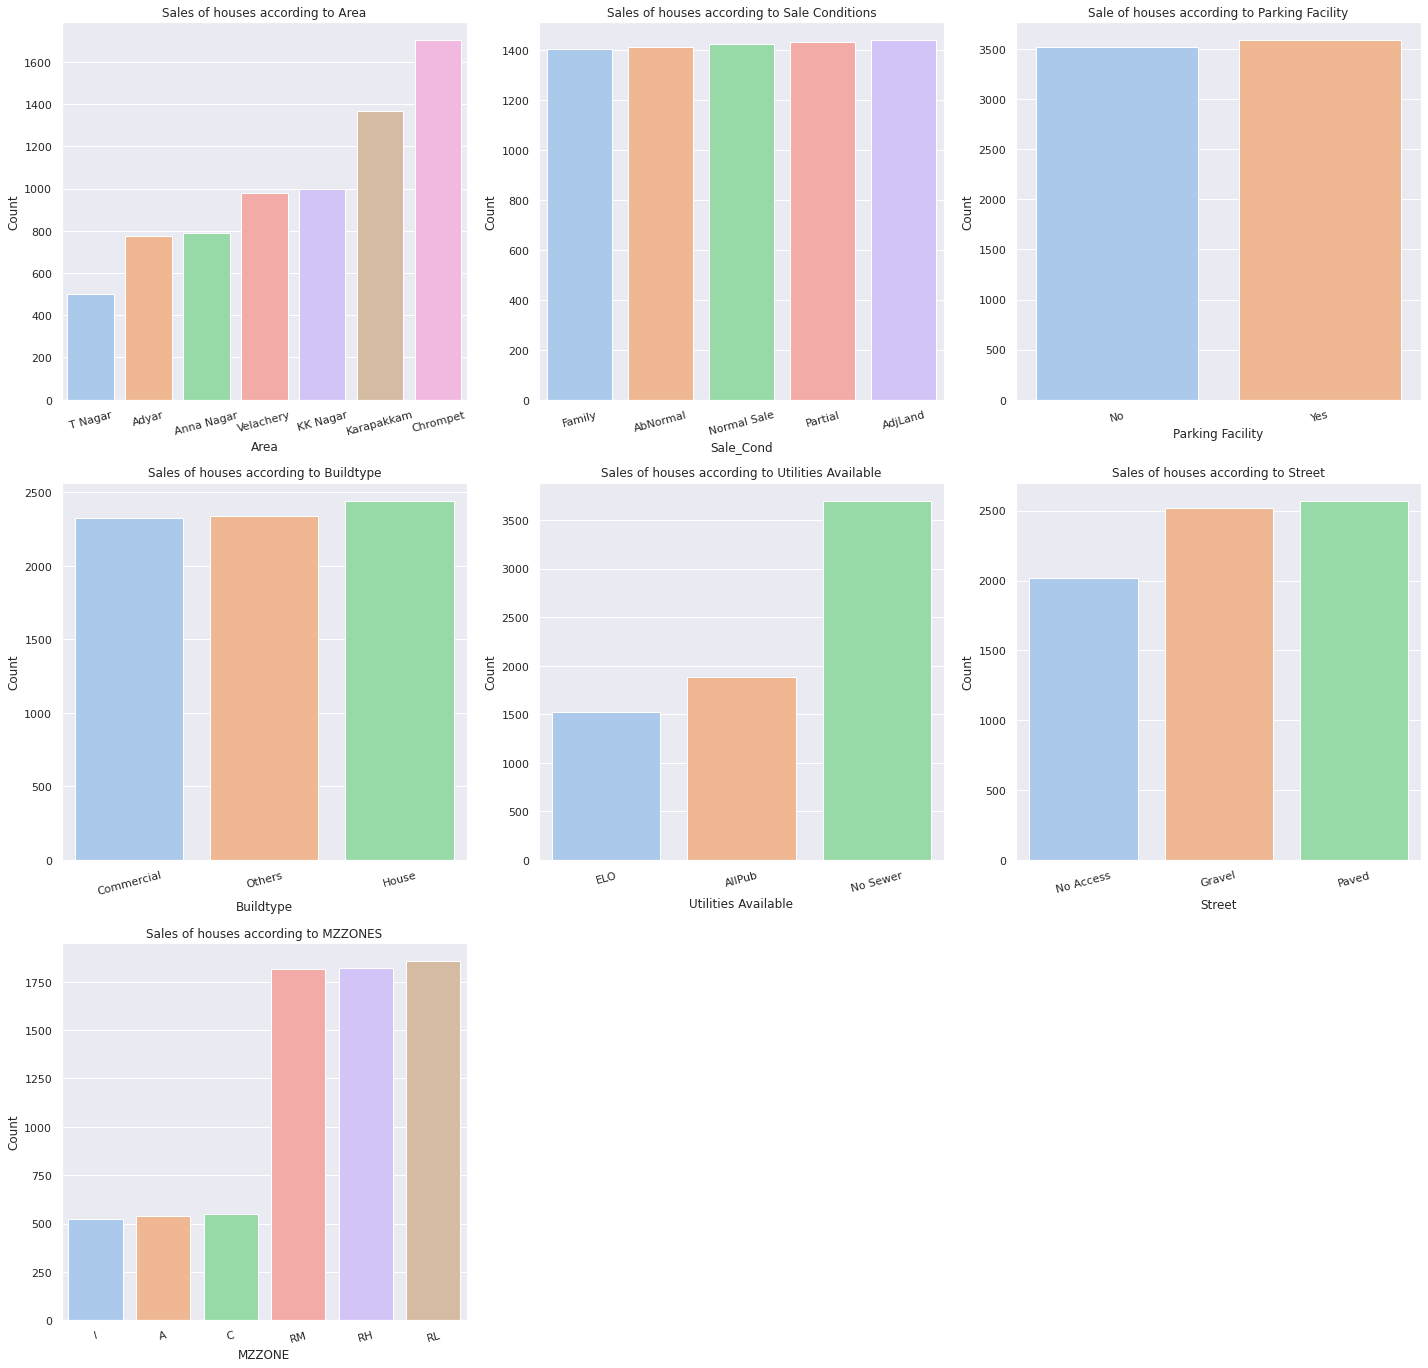

In [48]:
#plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(df['area'],order=df['area'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Sales of houses according to Area')

plt.subplot(432)
sns.countplot(df['sale_cond'],order=df['sale_cond'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Sale_Cond')
plt.ylabel('Count')
plt.title('Sales of houses according to Sale Conditions')

plt.subplot(433)
sns.countplot(df['park_facil'],order=df['park_facil'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Parking Facility')
plt.ylabel('Count')
plt.title('Sale of houses according to Parking Facility')

plt.subplot(434)
sns.countplot(df['buildtype'],order=df['buildtype'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Buildtype')
plt.ylabel('Count')
plt.title('Sales of houses according to Buildtype')

plt.subplot(435)
sns.countplot(df['utility_avail'],order=df['utility_avail'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Utilities Available')
plt.ylabel('Count')
plt.title('Sales of houses according to Utilities Available')

plt.subplot(436)
sns.countplot(df['street'],order=df['street'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Street')
plt.ylabel('Count')
plt.title('Sales of houses according to Street')

plt.subplot(437)
sns.countplot(df['mzzone'],order=df['mzzone'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('MZZONE')
plt.ylabel('Count')
plt.title('Sales of houses according to MZZONES')

plt.tight_layout()

<pre>Interpretations :
 1.) According to the column "area" the highest number of houses sold were in the area "Chrompet".
 2.) According to the column "sale_cond", no such category has a strong influence on sales of house.
 3.) According to the column "park_facil", houses with parking facilities are slightly sold more.
 4.) According to the column "buildtype", houses used for living are sold more then using it as commercial or other spaces.
 5.) According to the column "utility_avail", houses with No Sewer are most sold.
 6.) According to the column "street", paved street and gravel street are more sold compared to houses with no access to street.
 7.) According to the column "mzzone", Zones such as RL, RH, RM are the zones where the most number of houses got sold.</pre>

    Plotting barplots for Categorical Columns vs Mean Sales Price.

In [49]:
#orders for all the barplots in ascending order
area_order = df.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area']
sale_cond_order = df.groupby('sale_cond')['sales_price'].mean().reset_index().sort_values('sales_price')['sale_cond']
park_facil_order = df.groupby('park_facil')['sales_price'].mean().reset_index().sort_values('sales_price')['park_facil']
buildtype_order = df.groupby('buildtype')['sales_price'].mean().reset_index().sort_values('sales_price')['buildtype']
utility_avail_order = df.groupby('utility_avail')['sales_price'].mean().reset_index().sort_values('sales_price')['utility_avail']
street_order = df.groupby('street')['sales_price'].mean().reset_index().sort_values('sales_price')['street']
mzzone_order = df.groupby('mzzone')['sales_price'].mean().reset_index().sort_values('sales_price')['mzzone']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

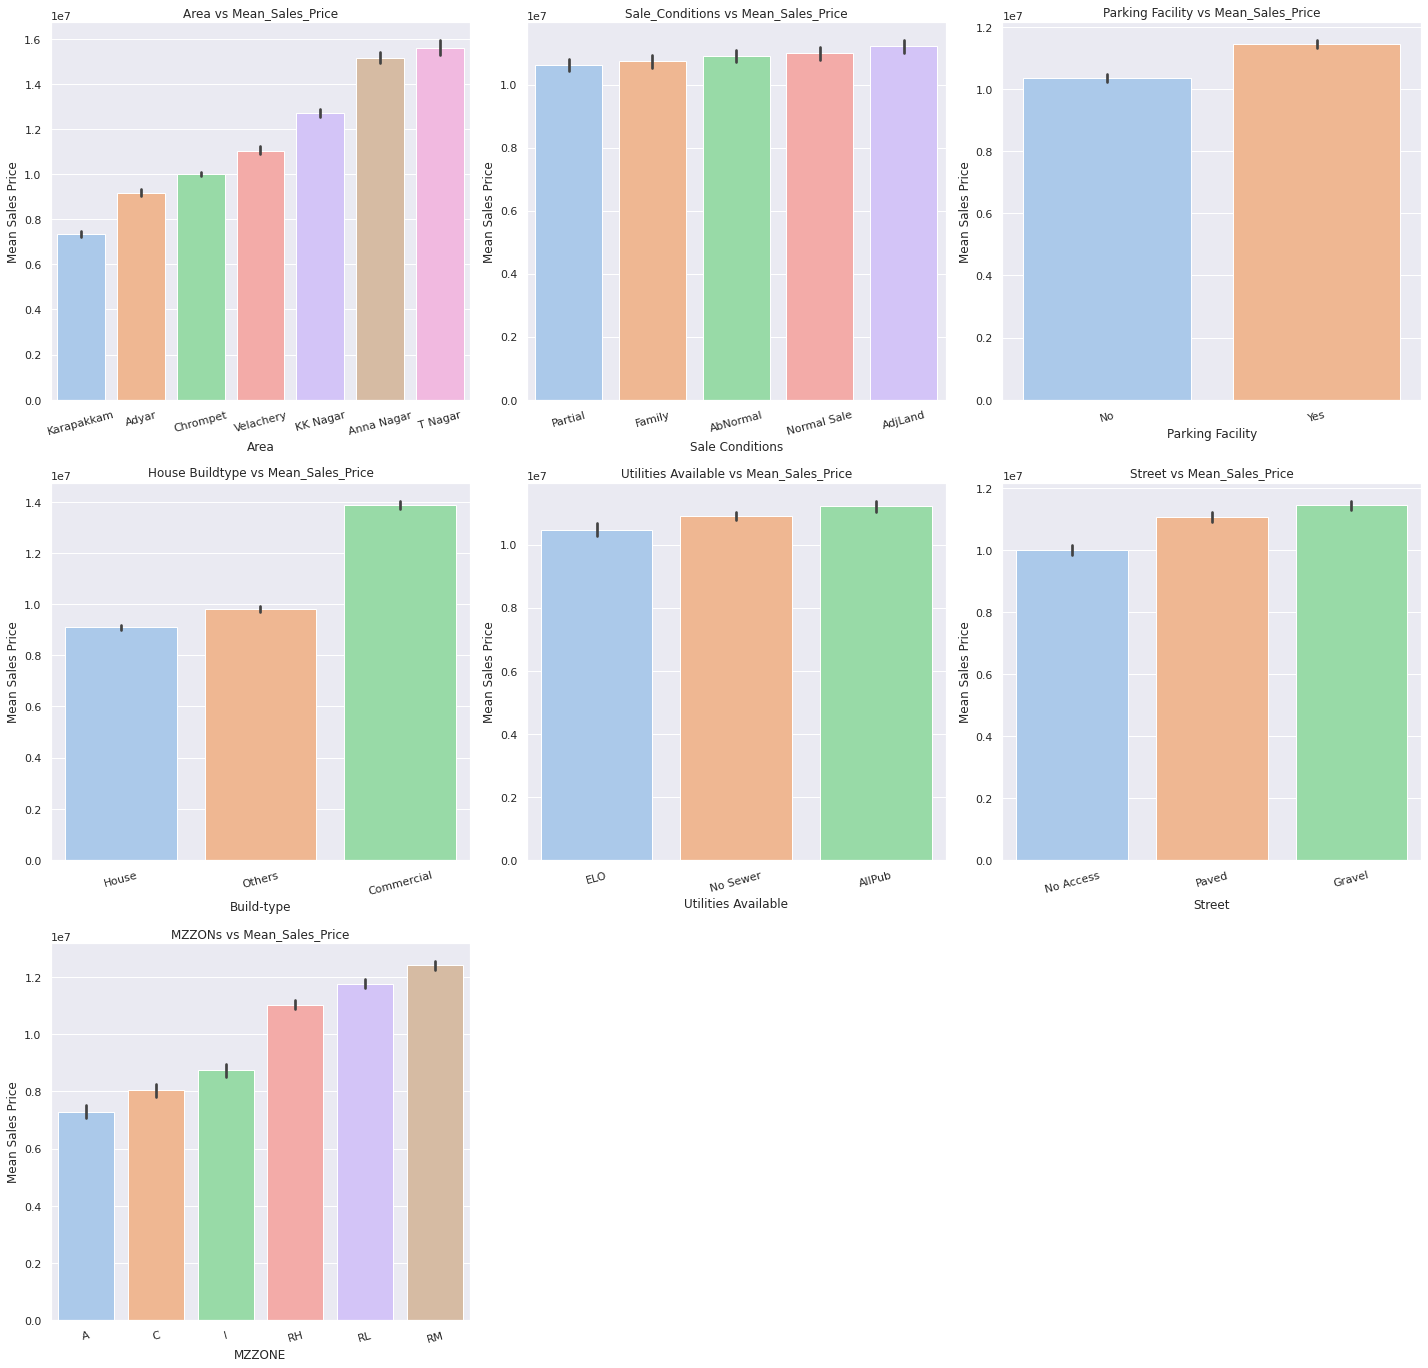

In [50]:
#for categorical columns
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.barplot(df['area'],df['sales_price'],order=area_order)
plt.xticks(rotation=15)
plt.xlabel('Area')
plt.ylabel('Mean Sales Price')
plt.title('Area vs Mean_Sales_Price')

plt.subplot(432)
sns.barplot(df['sale_cond'],df['sales_price'],order=sale_cond_order)
plt.xticks(rotation=15)
plt.xlabel('Sale Conditions')
plt.ylabel('Mean Sales Price')
plt.title('Sale_Conditions vs Mean_Sales_Price')

plt.subplot(433)
sns.barplot(df['park_facil'],df['sales_price'],order=park_facil_order)
plt.xticks(rotation=15)
plt.xlabel('Parking Facility')
plt.ylabel('Mean Sales Price')
plt.title('Parking Facility vs Mean_Sales_Price')

plt.subplot(434)
sns.barplot(df['buildtype'],df['sales_price'],order=buildtype_order)
plt.xticks(rotation=15)
plt.xlabel('Build-type')
plt.ylabel('Mean Sales Price')
plt.title('House Buildtype vs Mean_Sales_Price')

plt.subplot(435)
sns.barplot(df['utility_avail'],df['sales_price'],order=utility_avail_order)
plt.xticks(rotation=15)
plt.xlabel('Utilities Available')
plt.ylabel('Mean Sales Price')
plt.title('Utilities Available vs Mean_Sales_Price')

plt.subplot(436)
sns.barplot(df['street'],df['sales_price'],order=street_order)
plt.xticks(rotation=15)
plt.xlabel('Street')
plt.ylabel('Mean Sales Price')
plt.title('Street vs Mean_Sales_Price')

plt.subplot(437)
sns.barplot(df['mzzone'],df['sales_price'],order=mzzone_order)
plt.xticks(rotation=15)
plt.xlabel('MZZONE')
plt.ylabel('Mean Sales Price')
plt.title('MZZONs vs Mean_Sales_Price')

plt.tight_layout()

<pre>Interpretations : 
From the above data visualization it can be understood that the categorical columns do have linear realtionship with the 
target variable ("sales_price" here). 
So we have to use Ordinal Encoding to Encode all these categorical columns.</pre>

In [51]:
# Orders for maximum amount of money grabbing entities in ascending order
area_order_max = df.groupby('area')['sales_price'].max().reset_index().sort_values('sales_price')['area']
sale_cond_order_max = df.groupby('sale_cond')['sales_price'].max().reset_index().sort_values('sales_price')['sale_cond']
park_facil_order_max = df.groupby('park_facil')['sales_price'].max().reset_index().sort_values('sales_price')['park_facil']
buildtype_order_max = df.groupby('buildtype')['sales_price'].max().reset_index().sort_values('sales_price')['buildtype']
utility_avail_order_max = df.groupby('utility_avail')['sales_price'].max().reset_index().sort_values('sales_price')['utility_avail']
street_order_max = df.groupby('street')['sales_price'].max().reset_index().sort_values('sales_price')['street']
mzzone_order_max = df.groupby('mzzone')['sales_price'].max().reset_index().sort_values('sales_price')['mzzone']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

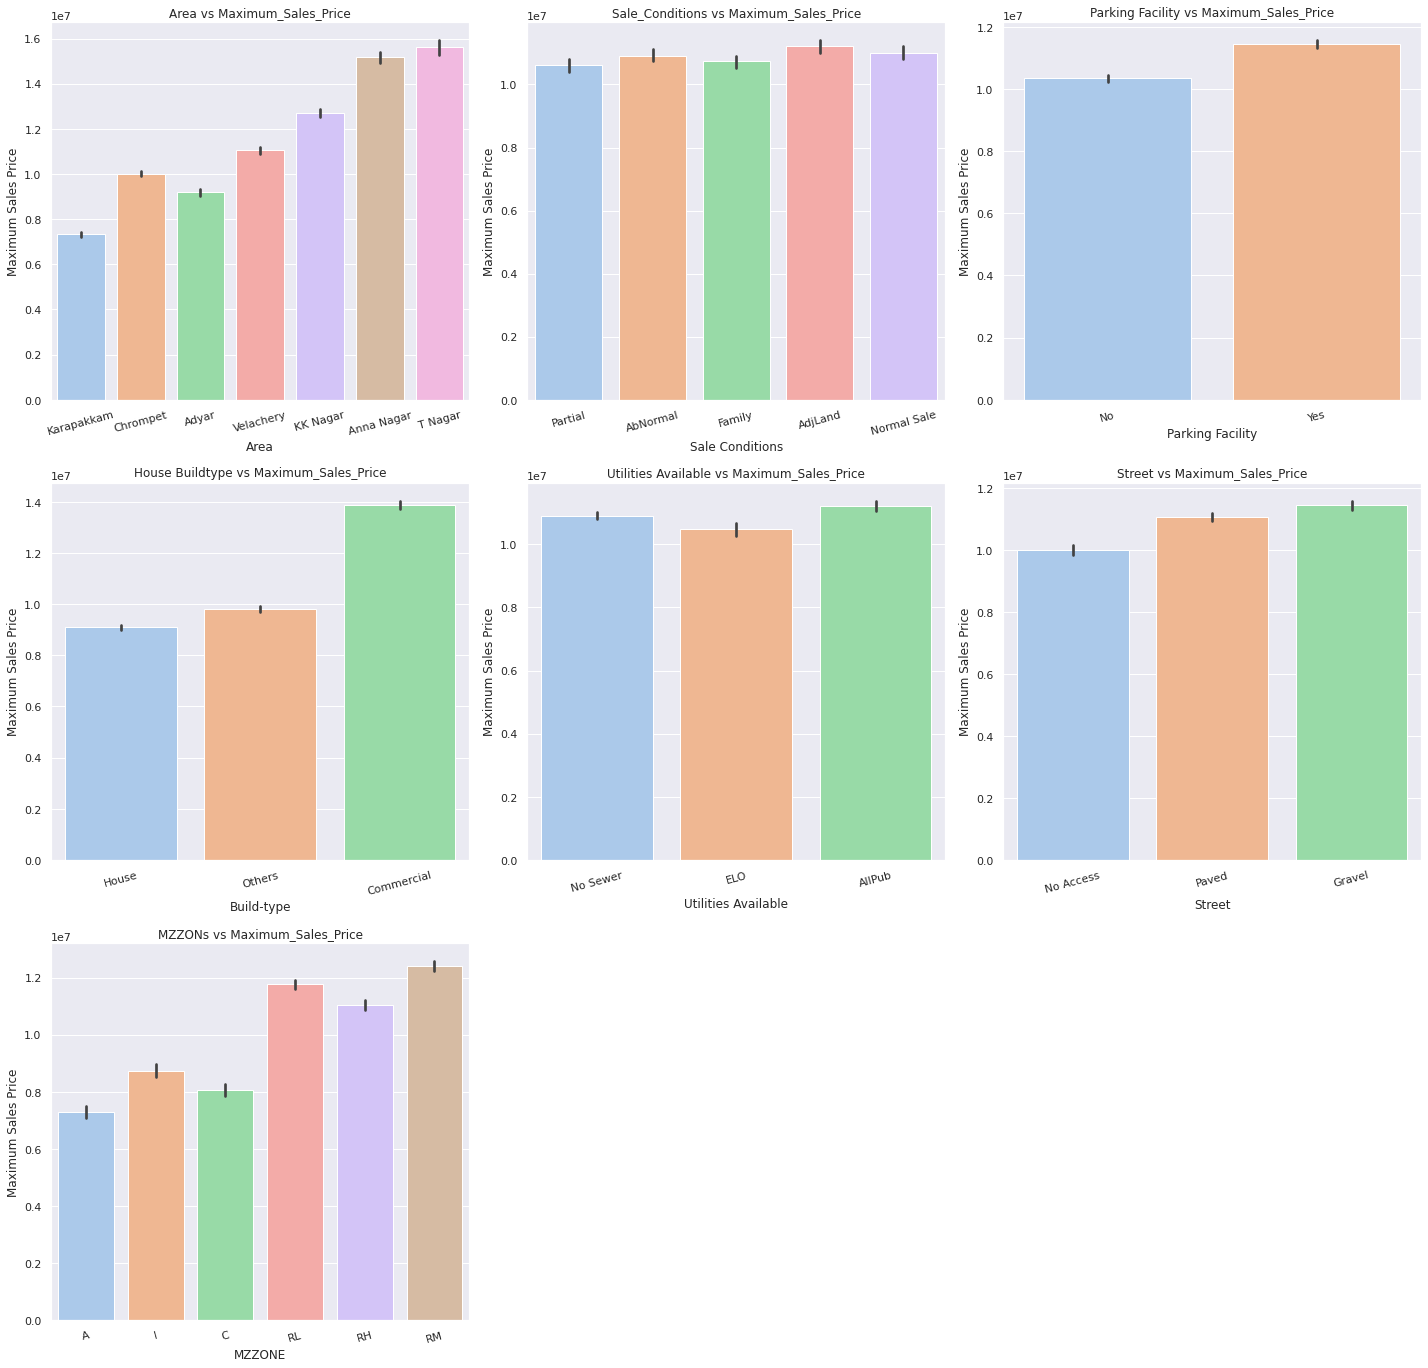

In [52]:
# Plotting a graph of all the categorical columns vs the maximum price for real estate agents to gain maximum benefits
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.barplot(df['area'],df['sales_price'],order=area_order_max)
plt.xticks(rotation=15)
plt.xlabel('Area')
plt.ylabel('Maximum Sales Price')
plt.title('Area vs Maximum_Sales_Price')

plt.subplot(432)
sns.barplot(df['sale_cond'],df['sales_price'],order=sale_cond_order_max)
plt.xticks(rotation=15)
plt.xlabel('Sale Conditions')
plt.ylabel('Maximum Sales Price')
plt.title('Sale_Conditions vs Maximum_Sales_Price')

plt.subplot(433)
sns.barplot(df['park_facil'],df['sales_price'],order=park_facil_order_max)
plt.xticks(rotation=15)
plt.xlabel('Parking Facility')
plt.ylabel('Maximum Sales Price')
plt.title('Parking Facility vs Maximum_Sales_Price')

plt.subplot(434)
sns.barplot(df['buildtype'],df['sales_price'],order=buildtype_order_max)
plt.xticks(rotation=15)
plt.xlabel('Build-type')
plt.ylabel('Maximum Sales Price')
plt.title('House Buildtype vs Maximum_Sales_Price')

plt.subplot(435)
sns.barplot(df['utility_avail'],df['sales_price'],order=utility_avail_order_max)
plt.xticks(rotation=15)
plt.xlabel('Utilities Available')
plt.ylabel('Maximum Sales Price')
plt.title('Utilities Available vs Maximum_Sales_Price')

plt.subplot(436)
sns.barplot(df['street'],df['sales_price'],order=street_order_max)
plt.xticks(rotation=15)
plt.xlabel('Street')
plt.ylabel('Maximum Sales Price')
plt.title('Street vs Maximum_Sales_Price')

plt.subplot(437)
sns.barplot(df['mzzone'],df['sales_price'],order=mzzone_order_max)
plt.xticks(rotation=15)
plt.xlabel('MZZONE')
plt.ylabel('Maximum Sales Price')
plt.title('MZZONs vs Maximum_Sales_Price')

plt.tight_layout()

<pre> Interpretations to be shared at the end of the project in the from of advice to the Real Estate Agents and Sellers.</pre>

    Plotting line plots for integer column vs Sales Price column.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 1.0, 'House Age vs Sales_Price')

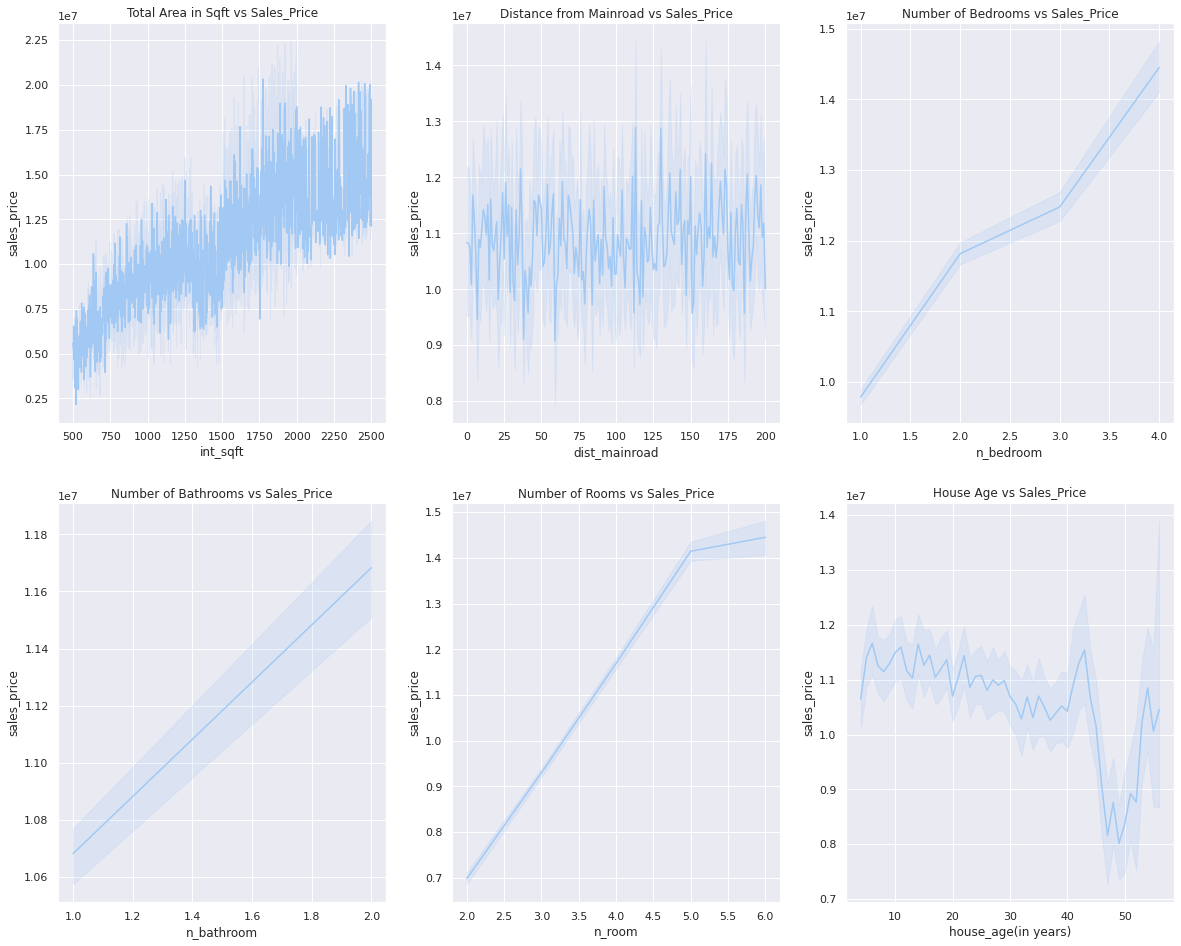

In [53]:
plt.figure(figsize=(20,25))
plt.subplot(331)
sns.lineplot(df['int_sqft'],df['sales_price'])
plt.title('Total Area in Sqft vs Sales_Price')
plt.subplot(332)
sns.lineplot(df['dist_mainroad'],df['sales_price'])
plt.title('Distance from Mainroad vs Sales_Price')
plt.subplot(333)
sns.lineplot(df['n_bedroom'],df['sales_price'])
plt.title('Number of Bedrooms vs Sales_Price')
plt.subplot(334)
sns.lineplot(df['n_bathroom'],df['sales_price'])
plt.title('Number of Bathrooms vs Sales_Price')
plt.subplot(335)
sns.lineplot(df['n_room'],df['sales_price'])
plt.title('Number of Rooms vs Sales_Price')
plt.subplot(336)
sns.lineplot(df['house_age(in years)'],df['sales_price'])
plt.title('House Age vs Sales_Price')

<pre>Interpretations : 
 
For columns 'int_sqft','n_bedroom,'n_bathroom,'n_room' there is a clear Linear Relationship with the 'Sales_Price' column.

For column 'dist_mainroad' the distribution is uniform, no such linear relationship is discovered here.

For column 'house_age' we can see a hybrid kinda behaviour. For house ages 10 to 40 the sales_price drops a bit,
but from 40 to ~43 house prices rises and then again falls from ~43 - 50 and again it rises from 50-...

    Plotting scatter plots for masked data vs the sales_price column

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

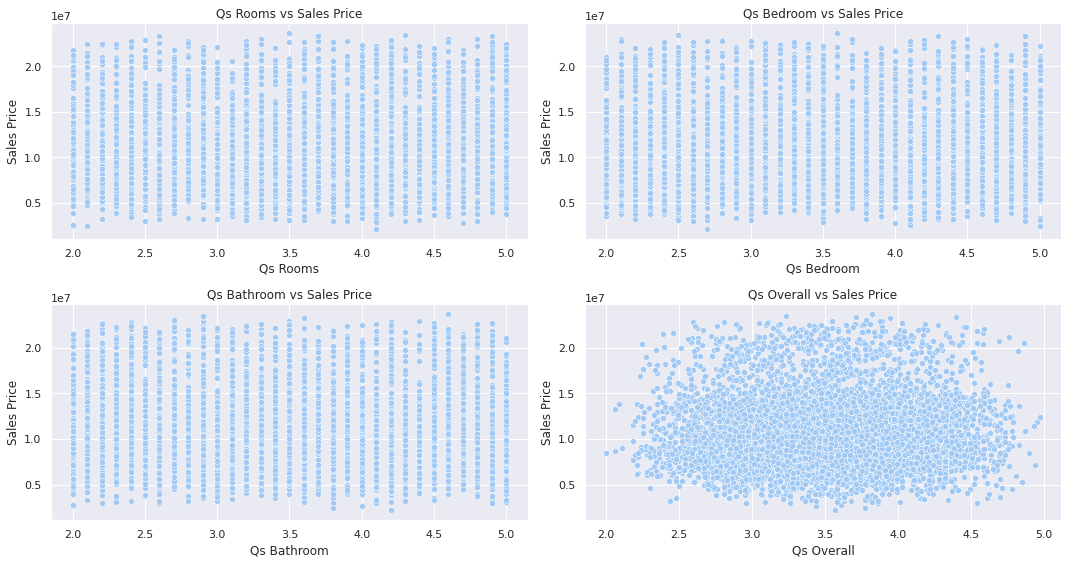

In [54]:
plt.figure(figsize=(15,8))

plt.subplot(221)
sns.scatterplot(df['qs_rooms'],df['sales_price'])
plt.xlabel('Qs Rooms')
plt.ylabel('Sales Price')
plt.title('Qs Rooms vs Sales Price')

plt.subplot(222)
sns.scatterplot(df['qs_bedroom'],df['sales_price'])
plt.xlabel('Qs Bedroom')
plt.ylabel('Sales Price')
plt.title('Qs Bedroom vs Sales Price')

plt.subplot(223)
sns.scatterplot(df['qs_bathroom'],df['sales_price'])
plt.xlabel('Qs Bathroom')
plt.ylabel('Sales Price')
plt.title('Qs Bathroom vs Sales Price')

plt.subplot(224)
sns.scatterplot(df['qs_overall'],df['sales_price'])
plt.xlabel('Qs Overall')
plt.ylabel('Sales Price')
plt.title('Qs Overall vs Sales Price')

plt.tight_layout()

<pre>Interpretations : 
From the above scatterplots we can clearly observe that none of the plots exihibits Linear Relationship with the 
Target Variable i.e Sales_Price.

## Encoding Categorical Variables

In [55]:
df['area'] = df['area'].map({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})
df['street'] = df['street'].map({'No Access':0,'Paved':1,'Gravel':2})
df['mzzone'] = df['mzzone'].map({'A':0,'C':1,'I':2,'RH':3,'RL':4,'RM':5})
df['park_facil'] = df['park_facil'].map({'No':0,'Yes':1})
df['buildtype'] = df['buildtype'].map({'House':0,'Others':1,'Commercial':2})
df['sale_cond'] = df['sale_cond'].map({'Partial':0,'Family':1,'AbNormal':2,'Normal Sale':3,'AdjLand':4})
df['utility_avail'] = df['utility_avail'].map({'ELO':0,'No Sewer':1,'AllPub':2})

In [56]:
df.head()

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price,house_age(in years)
0,0,1004,131,1,1,3,2,1,2,2,1,0,4.0,3.9,4.9,4.330,7600000,44
1,5,1986,26,2,1,5,2,0,2,2,2,3,4.9,4.2,2.5,3.765,21717770,11
2,1,909,70,1,1,3,2,1,2,0,2,4,4.1,3.8,2.2,3.090,13159200,20
3,3,1855,14,3,2,5,1,0,1,1,1,2,4.7,3.9,3.6,4.010,9630290,22
4,0,1226,84,1,1,3,2,1,1,2,2,1,3.0,2.5,4.1,3.290,7406250,30


## Splitting the data into input data and output data

In [57]:
#creating a function which will take the whole dataframe as input and return 2 dataframes, one containing input variables and the other
# holding the target variable

def split(dataframe):
  X = dataframe.drop('sales_price',axis=1)
  y = dataframe['sales_price']
  return X,y

In [58]:
X, y = split(df)

In [59]:
X

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,house_age(in years)
0,0,1004,131,1,1,3,2,1,2,2,1,0,4.0,3.9,4.9,4.330,44
1,5,1986,26,2,1,5,2,0,2,2,2,3,4.9,4.2,2.5,3.765,11
2,1,909,70,1,1,3,2,1,2,0,2,4,4.1,3.8,2.2,3.090,20
3,3,1855,14,3,2,5,1,0,1,1,1,2,4.7,3.9,3.6,4.010,22
4,0,1226,84,1,1,3,2,1,1,2,2,1,3.0,2.5,4.1,3.290,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,51,1,1,2,4,0,1,0,0,5,3.0,2.2,2.4,2.520,49
7105,3,1897,52,3,2,5,1,1,1,1,0,3,3.6,4.5,3.3,3.920,9
7106,3,1614,152,2,1,4,3,0,0,1,2,2,4.3,4.2,2.9,3.840,29
7107,0,787,40,1,1,2,0,1,2,0,1,4,4.6,3.8,4.1,4.160,31


In [60]:
y

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7104     5353000
7105    10818480
7106     8351410
7107     8507000
7108     9976480
Name: sales_price, Length: 7109, dtype: int64

In [61]:
#splitting the data into training and testing sets with the ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5687, 17) (1422, 17) (5687,) (1422,)


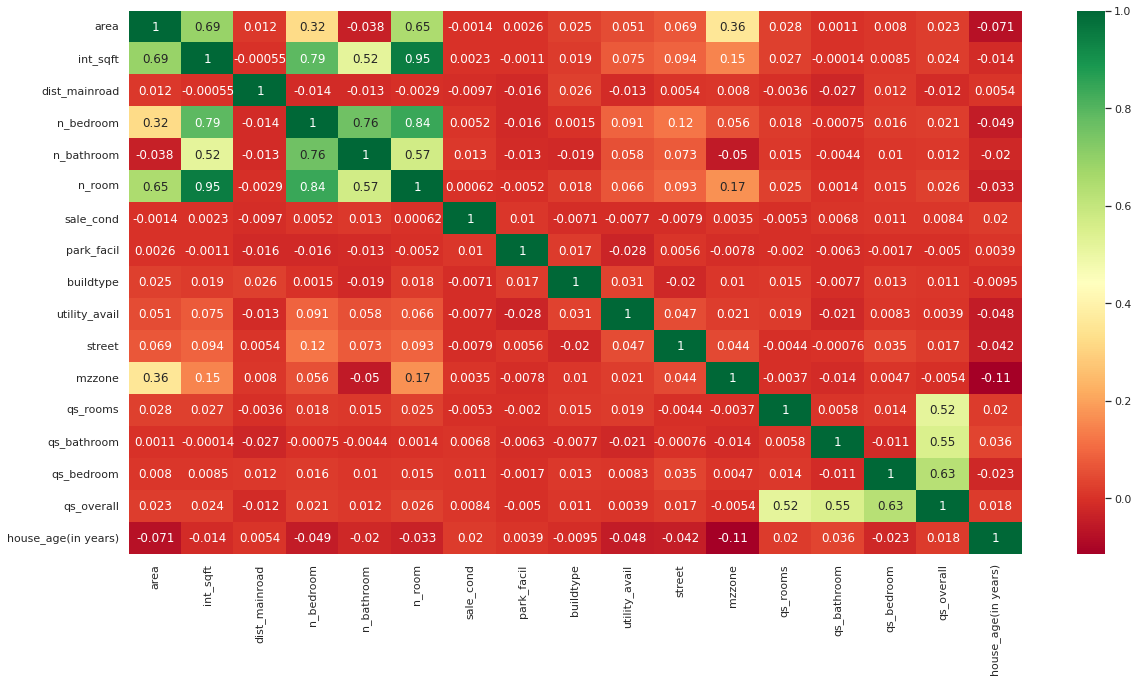

In [63]:
# checking for correlations in the input data
plt.figure(figsize=(20,10))
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix,annot=True,cmap='RdYlGn')

In [64]:
# creating a function to detect the presence of features in our training set where the features are highly correlated
def correlation(dataset,threshold):
  correlated_features = set()
  cor_matrix = dataset.corr()
  for i in range(len(cor_matrix.columns)):
    for j in range(i):
      if abs(cor_matrix.iloc[i,j]) > threshold:
        col_name = cor_matrix.columns[i]
        correlated_features.add(col_name)
  return correlated_features


In [65]:
corr_cols = correlation(X_train,0.8)

In [66]:
print(corr_cols)

{'n_room'}


<pre>Our correlation function says that the col "n_room" is highly correlated.
Upon research it comes out that the feature "n_room" has 0.95 correlation score with the column "int_sqft".
Therefore it is good to drop "n_room" from our data.</pre>

In [67]:
new_X_train = X_train.drop(corr_cols,axis=1)
new_X_test = X_test.drop(corr_cols,axis=1)

In [68]:
train = pd.concat([new_X_train,y_train],axis=1)
test = pd.concat([new_X_test,y_test],axis=1)

In [69]:
train.shape, test.shape

((5687, 17), (1422, 17))

In [70]:
new_df = pd.concat([train,test],axis=0)

In [71]:
new_df.shape

(7109, 17)

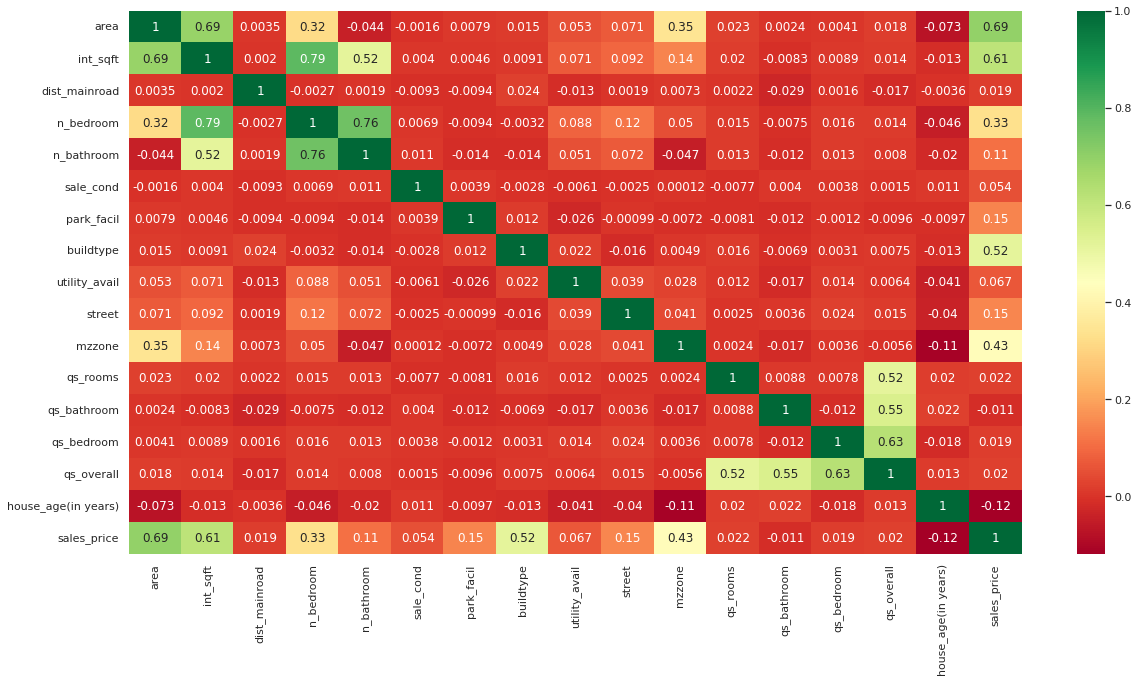

In [72]:
# checking correlation of variables with the target variable
new_corr_matrix = new_df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(new_corr_matrix,annot=True,cmap='RdYlGn')

In [73]:
# creating a dataframe to know the correlations of the all the input variables with the target variable "sales_price" here
target_corr = pd.DataFrame(new_df[new_df.columns[:]].corr()['sales_price'][:]).T
target_corr

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,house_age(in years),sales_price
sales_price,0.694149,0.612125,0.018783,0.330987,0.108834,0.05437,0.146428,0.515717,0.067147,0.149589,0.427789,0.021967,-0.011377,0.018804,0.020484,-0.119519,1.0


From the above "target_corr" dataframe you can get an idea about all the positive and negative correlations regaring the target column and other input cols.

In [74]:
# again splitting the data into input and output dataframes
X,y = split(new_df)

In [75]:
# further splitting the data into training and testing parts
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
X_train.shape,X_test.shape

((5687, 16), (1422, 16))

In [77]:
# Model-1 : Linear Regression
lr = LinearRegression()

In [78]:
lr.fit(X_train,y_train)

LinearRegression()

In [79]:
y_pred = lr.predict(X_test)

In [80]:
print('The r2 score of linear regression algorithm is ',r2_score(y_test,y_pred))

The r2 score of linear regression algorithm is  0.8712824228301796


In [81]:
# Model-2 : Bagging Regressor with default settings along with random_state set to 1
bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train,y_train)
y_pred = bag_regressor.predict(X_test)
print('The r2 score of default bagging regressor is ',r2_score(y_test,y_pred))

The r2 score of default bagging regressor is  0.9834321913749743


In [82]:
# Model-3 : Bagging Regressor with Linear Regression or Decision Tree as its base estimator and hyper parameters tuning with the help of GridSearchCV
bag_regressor = BaggingRegressor()

In [83]:
params = {'base_estimator': [None, LinearRegression()],
          'n_estimators': [10,20,40,60,80,100],
          'max_samples': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
          'max_features': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

In [84]:
bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1,n_jobs=-1,oob_score=True),params,verbose=1,n_jobs=-1,cv=3)

In [85]:
%%time
bagging_regressor_grid.fit(X_train,y_train)

Fitting 3 folds for each of 4800 candidates, totalling 14400 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
7200 fits failed out of a total of 14400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py", line 269, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py", line 351, in _fit
    raise ValueError("Out of bag estimation on

CPU times: user 56.8 s, sys: 4.58 s, total: 1min 1s
Wall time: 33min 13s


GridSearchCV(cv=3,
             estimator=BaggingRegressor(n_jobs=-1, oob_score=True,
                                        random_state=1),
             n_jobs=-1,
             param_grid={'base_estimator': [None, LinearRegression()],
                         'bootstrap': [True, False],
                         'bootstrap_features': [True, False],
                         'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                          0.8, 0.9, 1.0],
                         'max_samples': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                         0.9, 1.0],
                         'n_estimators': [10, 20, 40, 60, 80, 100]},
             verbose=1)

In [86]:
bagging_regressor_grid.best_estimator_

BaggingRegressor(n_estimators=100, n_jobs=-1, oob_score=True, random_state=1)

In [87]:
bagging_regressor_grid.best_estimator_.score(X_train,y_train)

0.9979034946387952

In [88]:
bagging_regressor_grid.best_estimator_.score(X_test,y_test)

0.9864748052653587

In [89]:
bagging_regressor_grid.best_params_

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 100}

<pre><b><u>Comparing r2 scores of all the used models :</u></b>

<i>Linear Regression</i> : 0.781
<i>Bagging Regressor(with default settings)</i> : 0.983
<i>Bagging Regressor(with base model as Decision Tree)</i> : 0.986

So for our problem statement Bagging Regressor with Decision Tree Regression as base estimator has the highest r2_score and hence most 
reliable here.

<pre>Advice to the Real Estate Agents :
For grabbing the maximum amount of money the Agents should take care of the following agenda :

✽ The property should be a "Commercial" space.
✽ The property should belong to the "RM" region of Chennai.
✽ The property should be located in "T Nagar".
✽ The property should have "AllPub" utility available for the owner.
✽ The property should have a "Parking" facility.
✽ The property should have "Access to Gravel" Streets.
✽ The property should have "2500 sqft area".
✽ The propert should have 4 bedrooms, 2 bathrooms and 6 rooms.
✽ Atlast the property should not be older then 10 years.

<pre>Advice to Sellers:

When it comes to sellers they should try to align their properties according to the agenda that Real Estate Agents follow,
in order to get higher returns for their properties.
✽ If the property is Commercial and in T-Nagar and in the RM zone with property age less then 10 years the owner should not 
hesitate asking for a higher amount, going against the trends elsewhere.

<pre>Advice to Buyers:
When it comes to Buyers it really depends upon the expectations and the ideal ideas of the buyers. 
Just giving them advices without knowing the background would be very obnoxious.
Furthermore Only when the buyer is questioned, possibilities for differnt things open up.</pre>

<pre>
Conclusions : 
✽ For Real Estate Traders there are sure shot ways of grabbing more money by following agenda.
✽ For Sellers it would be better for them to make few changes if possible in order to get a good return.
✽ Meanwhile for Buyers it is completely dependent on their expectations and usage and the reason they want to buy property.